# Capítulo 1: Electrostática y Campos

## Visualizando la Ley de Coulomb
La ecuación clásica es $\vec{E} = k \frac{q}{r^2}\hat{r}$, pero aquí vamos a ver cómo se comportan las líneas de campo realmente.

A continuación, tienes una simulación en vivo. **Prueba cambiar el valor de `q2` a `1.0` para ver la repulsión.**

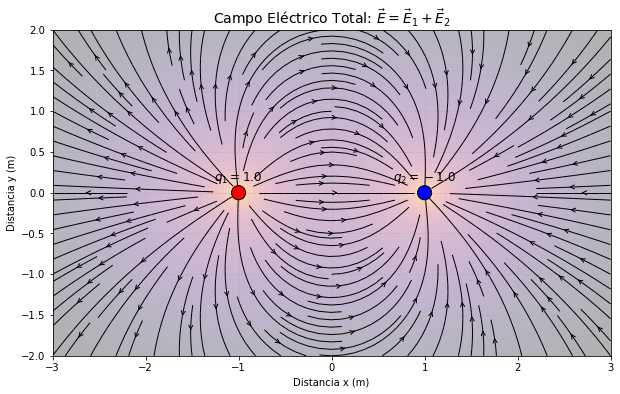

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# --- PARÁMETROS QUE EL ESTUDIANTE PUEDE MODIFICAR ---
# Carga 1 (en el origen)
q1 = 1.0   # Carga positiva
x1, y1 = -1.0, 0.0

# Carga 2 (puedes cambiarla a positiva para ver repulsión)
q2 = -1.0  # Carga negativa (Dipolo)
x2, y2 = 1.0, 0.0
# ----------------------------------------------------

def campo_electrico(x, y, q, x_c, y_c):
    k = 8.99e9
    # Distancia en componentes
    dx = x - x_c
    dy = y - y_c
    # Distancia al cuadrado y al cubo (para el vector unitario)
    r2 = dx**2 + dy**2
    r3 = r2**(1.5)
    
    # Evitar división por cero (pequeño truco numérico)
    r3[r3 == 0] = 1e-10
    
    # Componentes del campo E = k * q / r^2 * (r_vec / r) = k * q * r_vec / r^3
    Ex = k * q * dx / r3
    Ey = k * q * dy / r3
    return Ex, Ey

# Crear una malla de puntos (el "espacio")
x = np.linspace(-3, 3, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Calcular campo total (Principio de Superposición)
Ex1, Ey1 = campo_electrico(X, Y, q1, x1, y1)
Ex2, Ey2 = campo_electrico(X, Y, q2, x2, y2)

Ex_total = Ex1 + Ex2
Ey_total = Ey1 + Ey2
E_magnitud = np.sqrt(Ex_total**2 + Ey_total**2)

# --- GRAFICAR (La parte visual "Rupturista") ---
plt.figure(figsize=(10, 6))

# Mapa de color logarítmico para la intensidad (para ver el decaimiento)
# Usamos log porque cerca de la carga el campo tiende a infinito
plt.pcolormesh(X, Y, np.log10(E_magnitud), cmap='inferno', shading='auto', alpha=0.3)

# Líneas de campo (Streamplot)
plt.streamplot(X, Y, Ex_total, Ey_total, color='k', linewidth=1, density=1.5, arrowstyle='->')

# Dibujar las cargas
plt.scatter([x1, x2], [y1, y2], c=['red' if q1>0 else 'blue', 'red' if q2>0 else 'blue'], s=200, zorder=10, edgecolors='black')
plt.text(x1, y1+0.15, f"$q_1={q1}$", ha='center', fontsize=12, fontweight='bold')
plt.text(x2, y2+0.15, f"$q_2={q2}$", ha='center', fontsize=12, fontweight='bold')

plt.title(r'Campo Eléctrico Total: $\vec{E} = \vec{E}_1 + \vec{E}_2$', fontsize=14)
plt.xlabel('Distancia x (m)')
plt.ylabel('Distancia y (m)')
plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()